# ECE 3100 Fall 2018 - Final Exam
## Kayleigh James






























































## Question 1:

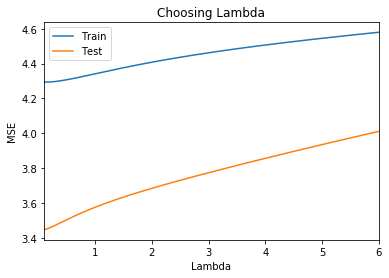

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score, train_test_split
import scipy.io

mat = scipy.io.loadmat('ex1.mat') #load in MATLAB data
df = pd.DataFrame(np.hstack((mat['x'], mat['y']))) #convert to pandas dataframe

X = df.loc[:,0]
y = df.loc[:,1] 

X2 = X.pow(2)
X3 = X.pow(3)
X4 = X.pow(4)
X5 = X.pow(5)
X6 = X.pow(6)
X7 = X.pow(7)
X8 = X.pow(8)
X9 = X.pow(9)
X10 = X.pow(10)
#add all polynomial terms
X = pd.concat([X, X2, X3, X4, X5, X6, X7, X8, X9, X10], axis=1, sort=False)
#normalize to mean=0, std dev=1
X = (X - X.mean())/X.std()
#split 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
def mse_cv(model):
    mse= -cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
    return(mse)
def mse_cv2(model):
    mse= -cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = 5)
    return(mse)
model_ridge = Ridge()
alphas = np.linspace(0,6,num=601)
cv_ridge = [mse_cv(Ridge(alpha = i)).mean() 
            for i in alphas]
cv_ridge2 = [mse_cv2(Ridge(alpha = i)).mean() 
            for i in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge2 = pd.Series(cv_ridge2, index = alphas)
plt.figure()
cv_ridge.plot(title = "Choosing Lambda",label='Train')
cv_ridge2.plot(title = "Choosing Lambda",label='Test')

plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.legend()
plt.xlim(left=0.1, right=6);

## Question 2:

In [2]:
import pandas as pd
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

mat = scipy.io.loadmat('ex2.mat') #load in MATLAB data
df = pd.DataFrame(np.hstack((mat['features'], mat['responses']))) #convert to pandas dataframe
df = df.sample(frac=1).reset_index(drop=True) #shuffle the dataset each time
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,5.3623,5.2098,5.4737,6.6263,9.9236,18.4619,14.8866,9.0737,7.0913,6.6193,...,1.3381,1.3653,1.3287,1.2811,1.2763,1.3169,1.3483,1.3107,1.2368,1.0
1,4.9433,5.0977,5.4833,6.4282,8.9200,17.1025,19.1354,9.4207,6.7783,6.3983,...,1.6321,1.4852,1.4735,1.5740,1.6437,1.5194,1.3163,1.1748,1.1029,1.0
2,4.5902,5.2543,6.6932,9.8117,17.3004,25.8255,18.0681,13.4678,11.9157,11.7887,...,1.4969,1.5541,1.5478,1.4590,1.3808,1.3799,1.4600,1.5504,1.5209,1.0
3,12.6043,11.5151,11.8183,14.7271,24.3701,37.5369,21.2592,14.8966,13.5028,14.7867,...,1.1933,1.2063,1.2619,1.3244,1.3348,1.2928,1.2713,1.3387,1.5438,1.0
4,21.5607,25.9883,35.9847,46.7400,38.2484,29.5141,26.3746,25.7441,24.6300,22.6506,...,1.4635,1.3889,1.3834,1.4727,1.5947,1.6398,1.6309,1.6936,1.8663,2.0


In [3]:
X = df.loc[:,0:139] #140 columns are features
y = df.loc[:,140] #one column of response

In [4]:
#convert to binary classification
y = y.replace(to_replace=1, value=0) #class 1 to negative class
y = y.replace(to_replace=2, value=0) #class 2 to negative class
y = y.replace(to_replace=3, value=1) #class 3 to positive class

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
... X, y, test_size=0.40, random_state=42) #split to 60% train, rest for test

In [6]:
#train Naive Bayes Classifier
gnb = GaussianNB()
y_pred_train = gnb.fit(X_train, y_train).predict(X_train) #use to predict train
y_pred_test = gnb.fit(X_train, y_train).predict(X_test) #use to predict test

class_report_train = classification_report(y_train, y_pred_train) #train f1, prec, recall
class_report_test = classification_report(y_test, y_pred_test) #test f1, prec, recall

acc_train = accuracy_score(y_train, y_pred_train) #train accuracy
acc_test = accuracy_score(y_test, y_pred_test) #test accuracy

print("Accuracy of Train: %f \n" % (acc_train))
print("Accuracy of Test: %f \n" % (acc_test))

print("Train Precision, Recall, & F1 Score\n")
print(class_report_train)

print("Test Precision, Recall, & F1 Score\n")
print(class_report_test)


Accuracy of Train: 0.969697 

Accuracy of Test: 1.000000 

Train Precision, Recall, & F1 Score

             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97        19
        1.0       1.00      0.93      0.96        14

avg / total       0.97      0.97      0.97        33

Test Precision, Recall, & F1 Score

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        14
        1.0       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        22



In [7]:
df = pd.DataFrame(np.hstack((mat['points'], mat['expected']))) #convert to pandas dataframe
df = df.sample(frac=1).reset_index(drop=True) #shuffle the dataset each time
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,10.8156,13.4922,15.9691,12.6912,8.8040,6.5935,5.4018,4.8169,4.6914,5.0303,...,1.0868,1.0683,1.0988,1.1577,1.2207,1.2881,1.3854,1.5141,1.5877,2.0
1,11.5076,12.7375,15.2584,20.2873,31.0176,46.1783,36.6476,25.9575,21.6559,20.5218,...,1.2938,1.1665,1.0918,1.0862,1.1447,1.2503,1.3521,1.3697,1.2877,1.0
2,9.6566,12.4529,9.5947,6.2945,5.0388,4.8899,5.6474,7.6126,10.4605,10.4744,...,1.2804,1.2279,1.1898,1.1791,1.1773,1.1758,1.2022,1.2932,1.4294,2.0


In [8]:
#Use expected and points from the file
points = df.loc[:,0:139] #140 columns are features
expected = df.loc[:,140] #one column of response
expected = expected.replace(to_replace=1, value=0) #class 1 to negative class
expected = expected.replace(to_replace=2, value=0) #class 2 to negative class
expected = expected.replace(to_replace=3, value=1) #class 3 to positive class

In [9]:
expected_pred = gnb.fit(X_train, y_train).predict(points) #use to predict expected
miss_err = 1 - accuracy_score(expected, expected_pred) #misclassification error
acc_exp = accuracy_score(expected, expected_pred) #test accuracy
class_report_exp = classification_report(expected, expected_pred)
print("Accuracy of Points/Expected: %f \n" % (acc_exp))
print("Misclassification Error for Points/Expected: %f \n" % (miss_err))
print("Expected Set Precision, Recall, & F1 Score\n")
print(class_report_exp)

Accuracy of Points/Expected: 0.666667 

Misclassification Error for Points/Expected: 0.333333 

Expected Set Precision, Recall, & F1 Score

             precision    recall  f1-score   support

        0.0       1.00      0.67      0.80         3
        1.0       0.00      0.00      0.00         0

avg / total       1.00      0.67      0.80         3



C:\Users\jamesmk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
mat = scipy.io.loadmat('ex2.mat') #load in MATLAB data
df = pd.DataFrame(np.hstack((mat['features'], mat['responses']))) #convert to pandas dataframe
df = df.sample(frac=1).reset_index(drop=True) #shuffle the dataset each time
#train elastic net
X_train, y_train = make_regression(n_features=140, random_state=0)
l1_reg = 0.01 / .2 #l1 ratio (needed for sklearn implementation) is lambda/alhpa 
regr = ElasticNetCV(l1_ratio=l1_reg)
regr.fit(X_train, y_train)
coefs = regr.coef_ #capture the returned coefficients 
print(sum(coefs==0),'zero coefficients')
print(sum(coefs!=0),'non-zero coefficients')

1 zero coefficients
139 non-zero coefficients


In [11]:
indexArray = [i for i, x in enumerate(coefs) if x]
print(indexArray)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]


In [12]:
y = df.loc[:,140] #one column of response
X = df.loc[:,indexArray] #only columns with non-zero coefficients

In [13]:
y = y.replace(to_replace=1, value=0) #class 1 to negative class
y = y.replace(to_replace=2, value=0) #class 2 to negative class
y = y.replace(to_replace=3, value=1) #class 3 to positive class

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
... X, y, test_size=0.40, random_state=42) #split to 60% train, rest for test

In [15]:
#re-do all of the before stuff with unnecessary features removed
gnb = GaussianNB()
y_pred_train = gnb.fit(X_train, y_train).predict(X_train) #use to predict train
y_pred_test = gnb.fit(X_train, y_train).predict(X_test) #use to predict test

class_report_train = classification_report(y_train, y_pred_train) #train f1, prec, recall
class_report_test = classification_report(y_test, y_pred_test) #test f1, prec, recall

acc_train = accuracy_score(y_train, y_pred_train) #train accuracy
acc_test = accuracy_score(y_test, y_pred_test) #test accuracy

print("Accuracy of Train: %f \n" % (acc_train))
print("Accuracy of Test: %f \n" % (acc_test))

print("Train Precision, Recall, & F1 Score\n")
print(class_report_train)

print("Test Precision, Recall, & F1 Score\n")
print(class_report_test)


Accuracy of Train: 1.000000 

Accuracy of Test: 0.954545 

Train Precision, Recall, & F1 Score

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        18
        1.0       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        33

Test Precision, Recall, & F1 Score

             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97        15
        1.0       1.00      0.86      0.92         7

avg / total       0.96      0.95      0.95        22



In [16]:
points = df.loc[:,indexArray] #140 columns are features
expected = df.loc[:,140] #one column of response
expected = expected.replace(to_replace=1, value=0) #class 1 to negative class
expected = expected.replace(to_replace=2, value=0) #class 2 to negative class
expected = expected.replace(to_replace=3, value=1) #class 3 to positive class
expected_pred = gnb.fit(X_train, y_train).predict(points) #use to predict expected
miss_err = 1 - accuracy_score(expected, expected_pred) #misclassification error
acc_exp = accuracy_score(expected, expected_pred) #test accuracy
class_report_exp = classification_report(expected, expected_pred)
print("Accuracy of Points/Expected: %f \n" % (acc_exp))
print("Misclassification Error for Points/Expected: %f \n" % (miss_err))
print("Expected Set Precision, Recall, & F1 Score\n")
print(class_report_exp)

Accuracy of Points/Expected: 0.981818 

Misclassification Error for Points/Expected: 0.018182 

Expected Set Precision, Recall, & F1 Score

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99        33
        1.0       1.00      0.95      0.98        22

avg / total       0.98      0.98      0.98        55



After running my code several times, I noticed that the metrics would fluctuate several percent due to taking different data in the test and train sets (since we shuffle each time the code is run).  Additionally, prior to removing the unnecessary features with the elastic net, running the model on the expected/points data set didn't yield good metrics.  However, after the removal of the unnecessary features, the model performed very well for the expected/points data set.  Using an elastic net helps us to decide which features we should remove or keep to improve the accuracy and other metrics of our model.